In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

def polynomial_creator(*coeffs):
    """ coefficients are in the form a_n, a_n_1, ... a_1, a_0
    """
    def polynomial(x):
        res = coeffs[0]
        for i in range(1, len(coeffs)):
            res = res * x + coeffs[i]
        return res
    return polynomial

def polynomial_plotter(polynomial, domain, num_points=100, show_plot = True):
    """ plots the polynomial in the given range with the give number of points
    """
    start, stop = domain
    points = np.linspace(start, stop,num_points)
    func_values = polynomial(points)
    plt.plot(points, func_values)
    if show_plot:
        plt.show()

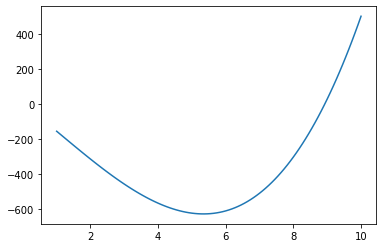

In [2]:
my_polynomial = polynomial_creator(3,-10,-150,3)
polynomial_plotter(my_polynomial, [1, 10])

In [3]:
def multi_creator(*coefs):
    print("number of varibles=")
    print(len([*coefs]))
    def multivariate_function(x):
        initial_polynomial = polynomial_creator(*coefs[0])(x[0])
        print ( initial_polynomial)
        for i in range(1, len(x)):
             initial_polynomial =  initial_polynomial + x[i]*polynomial_creator(*coefs[i])(x[i])
        return  initial_polynomial
    return multivariate_function
def multivariate_function(x):
        polynomial = polynomial_creator(*coefs[0])(x[0])
        print (polynomial)
        for i in range(1, len(x)):
            polynomial = polynomial + x[i]*polynomial_creator(*coefs[i])(x[i])
        return polynomial

In [4]:
def multinomial_plotter(multivariable_function, domain, num_points=100, show_plot = True):

    start, stop = domain
    points1 = np.linspace(start, stop,num_points)
    np.random.shuffle(points1)
    points2 = np.linspace(start, stop,num_points)
    np.random.shuffle(points2)
    func_values = multivariable_function([points1,points2])
    if show_plot:
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.scatter(points1, points2, func_values)
        plt.show()

number of varibles=
3
[ -754.8829584     57.12524269  1338.14135252 ...   518.80895334
 -5273.22705305 -7939.34634305]


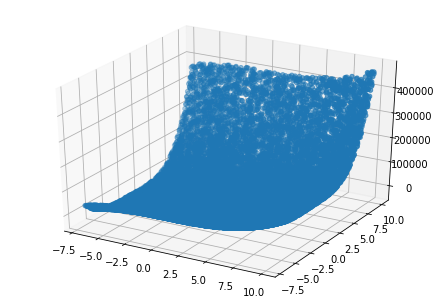

In [5]:
my_multinomial =multi_creator([76, 24, 56, 19],[34, 57, 32, -98],[82, 49, 69])
multinomial_plotter(my_multinomial, [-7,10], num_points=20000, show_plot = True)

In [6]:
def pop_fitness(pop):
    fitness=np.empty(0)
    for i in range(pop.shape[1]+1):
        fitness=np.append(fitness, polynomial(pop[i,:]))
    return fitness

In [7]:
polynomial1 = multi_creator([1,2],[3,4],[5])
polynomial1([1,2,3])

number of varibles=
3
3


38

In [8]:
def selecting_best(pop,fitnes,num_parents_mating):
    
    parents = np.empty((num_parents_mating, pop.shape[1]))
    
    for p_index in range(num_parents_mating):
        

        maximum_fit_indx = np.where(fitnes == np.max(fitnes))

        maximum_fit_indx = maximum_fit_indx[0][0]

        parents[p_index, :] = pop[maximum_fit_indx, :]
        fitnes[maximum_fit_indx]=-97383273248
    return parents
    

In [9]:
def cross (firstparent,secondparent):
    baby=firstparent
    
    
    
    for i in range(num_of_variables):
        r=random.randrange(0,num_of_variables)
        if r <i+1 | r >i :
            baby[i]=secondparent[i]
        
    return baby


In [10]:
def crossover(parents):
    offspring=np.empty((3))
    for i in range(parents.shape[0]-1):
        child=cross(parents[i],parents[i+1])
        offspring=np.vstack((offspring,child))
    offspring=np.delete(offspring,(0),axis=0)
    #offspring=np.reshape(offspring_temp,(2,3))    
    return offspring

In [11]:
def mutate(child):
     for i in range(num_of_variables):
        r=random.randrange(0,5)
        if r <i+1 | r >i :
            child[i]=np.random.uniform(-5,5)
        return child
    

In [12]:
def mutation(new_gen):
    m_offspring=np.empty((3))
    for j in range(new_gen.shape[0]):
        m_child=mutate(new_gen[j])
        m_offspring=np.vstack((m_offspring,m_child))
    return m_offspring
        

In [13]:
polynomial = multi_creator([-76, -24, 56, -19],[-34, -57, 32, -98],[-82, -49, 69])
num_of_variables=3
solution_per_pop = 4
# Defining the population size.
population_size = (solution_per_pop,num_of_variables)

new_population = np.random.uniform(low=-5.0, high=5.0, size=population_size)
print("new_population=")
print(new_population)

num_generations = 3

num_parents_mating = 4

for i in range (num_generations):
    fit=pop_fitness(new_population)
    print("new_fitness=")
    print(fit)
    best_parents=selecting_best(new_population,fit,num_parents_mating)
    crossed_population=crossover(best_parents)
    mutated_population=mutation(crossed_population)
    #updating_generation
    new_population=mutated_population
    print("new_population=")
    print(new_population)

number of varibles=
3
new_population=
[[-3.28275966e+00  1.48212067e+00  6.91498088e-01]
 [ 3.04700115e-01  3.79767508e-03  3.83030377e-01]
 [ 3.21914146e+00 -2.39126748e+00 -1.33195393e+00]
 [ 1.05297760e+00 -4.52742307e+00  2.11053140e+00]]
2227.1580553539766
-6.314970692170547
-2622.762794832479
-75.37364260222702
new_fitness=
[ 1.79973197e+03  7.94549934e+00 -2.52281752e+03 -8.81471912e+03]
new_population=
[[ 1.79973197e+03  7.94549934e+00 -2.52281752e+03]
 [-3.28275966e+00  3.79767508e-03  3.83030377e-01]
 [ 3.62829478e+00  3.79767508e-03 -1.33195393e+00]
 [ 4.06401659e+00 -2.39126748e+00  2.11053140e+00]]
-443111668040.31573
2227.1580553539766
-3761.8865690933194
-5289.094558765969
new_fitness=
[ 8.73229235e+11  2.24141853e+03 -3.74732633e+03 -6.04760185e+03]
new_population=
[[ 8.73229235e+11  2.24141853e+03 -3.74732633e+03]
 [-1.82039120e+00  3.79767508e-03  3.83030377e-01]
 [ 3.62829478e+00  3.79767508e-03 -1.33195393e+00]
 [ 4.97838513e+00 -2.39126748e+00  2.11053140e+00]]
-5.